In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from irls_optimizer import IRLS
from Logreg import LogisticRegression 

from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# UCI Shopper

In [3]:
from datasets import load_dataset

ds = load_dataset("jlh/uci-shopper")

Xy = ds["train"].with_format("pandas")[:]
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
X.head()

/Users/adam/.pyenv/versions/3.10.9/envs/flwr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [4]:
X.shape[1]

17

Big datasets since 17 features

In [5]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe_cols = ["Month", "VisitorType", "Weekend"]
oe.fit(X[oe_cols])
X[oe_cols] = oe.transform(X[oe_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch::  12%|█▏        | 12/100 [00:05<00:38,  2.26it/s]

Early stopping after epoch 12
Reverting to the weights corresponding to the lowest loss
0.8890916463909164
0.8690186536901865


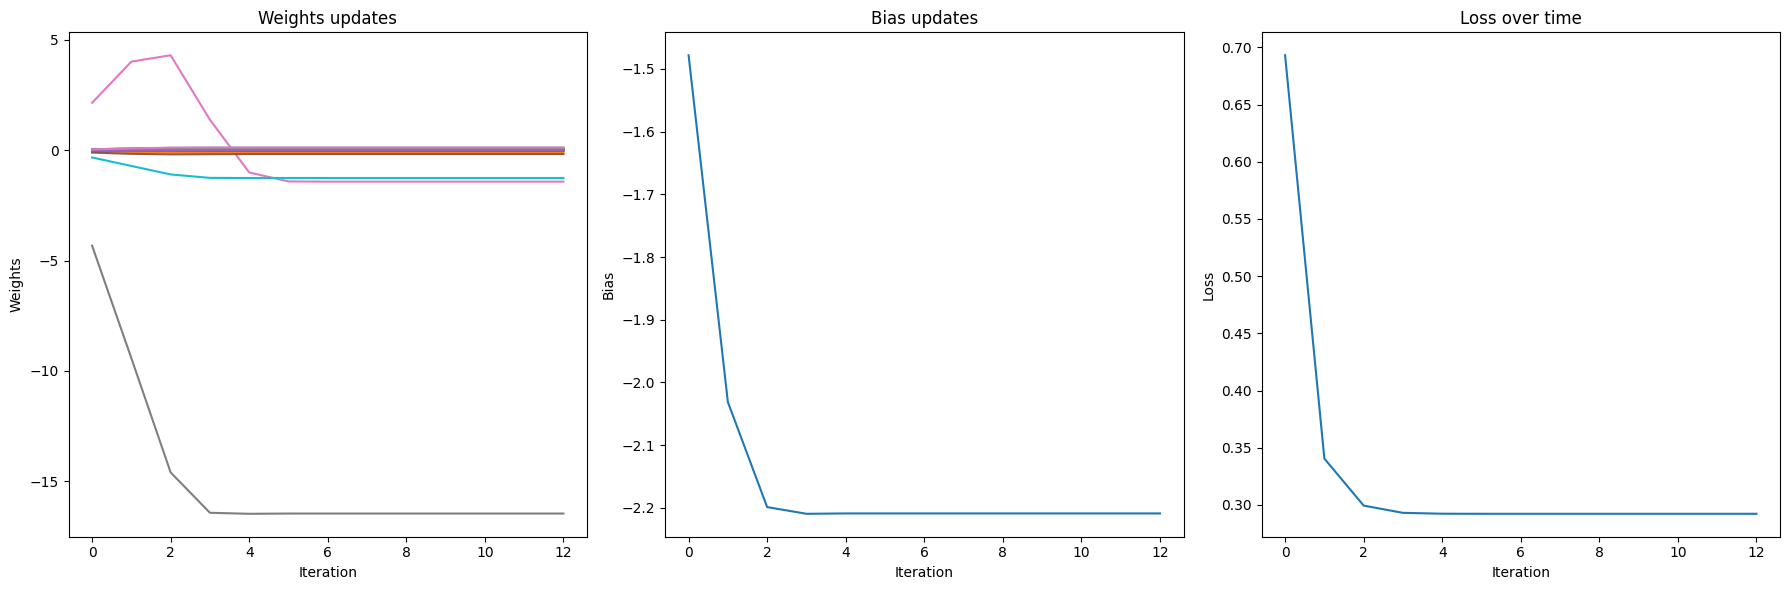

In [6]:
irls = IRLS()

log_reg = LogisticRegression(input_dim=X_train.shape[1])
log_reg.train(X_train, y_train, optimizer=irls, patience=5, epochs=100, batch_size=X_train.shape[0])

y_pred_train=log_reg.predict(X_train).round()
print(accuracy_score(y_pred_train, y_train))
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_pred.round(), y_test))

log_reg.plot_params()

# mstz/blood

In [7]:
from datasets import load_dataset

ds = load_dataset("mstz/blood")

Xy = ds["train"].with_format("pandas")[:]
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,months_since_last_donation,total_donation,total_blood_donated_in_cc
0,2,50,12500
1,0,13,3250
2,1,16,4000
3,2,20,5000
4,1,24,6000


Small dataset

Epoch::  10%|█         | 10/100 [00:00<00:00, 111.70it/s]


Early stopping after epoch 10
Reverting to the weights corresponding to the lowest loss
0.7709030100334449
0.76


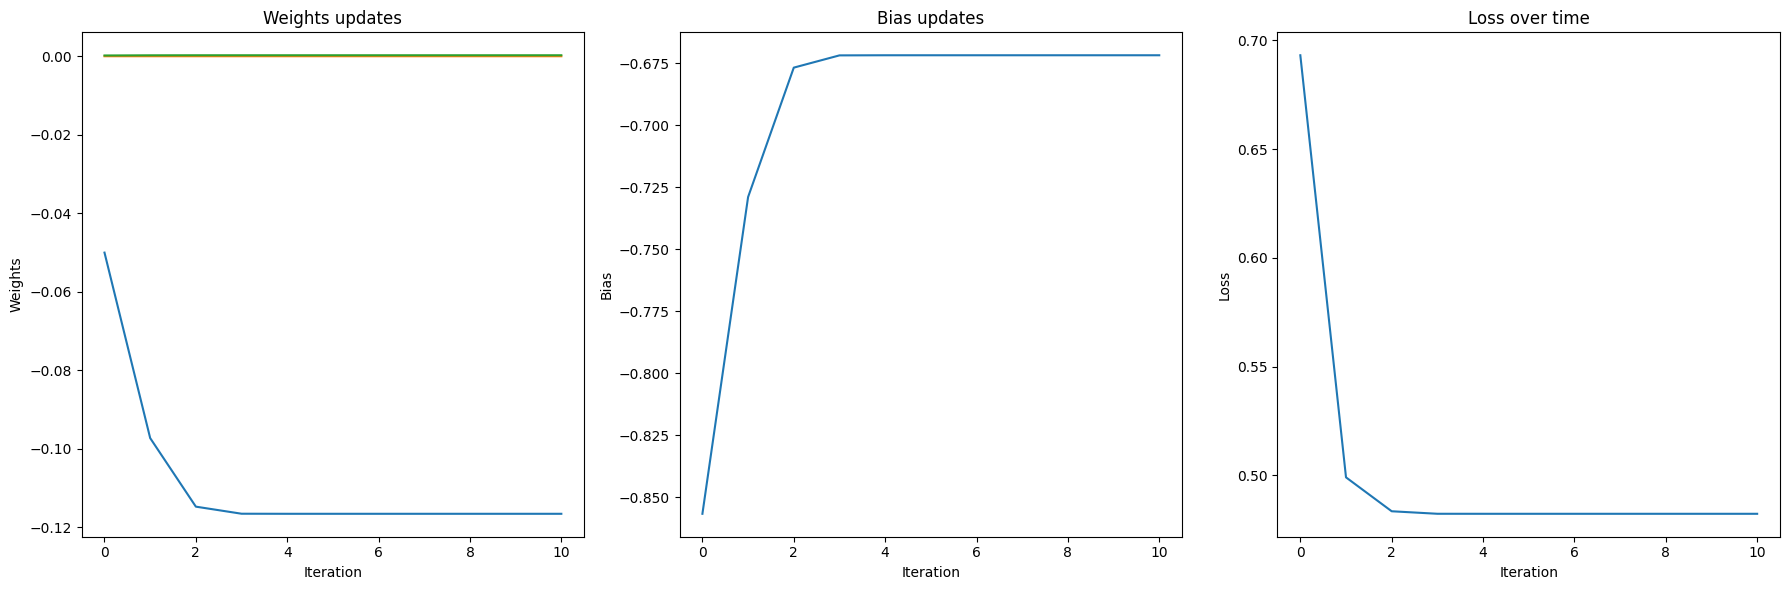

In [8]:
irls = IRLS()

log_reg = LogisticRegression(input_dim=X_train.shape[1])
log_reg.train(X_train, y_train, optimizer=irls, patience=5, epochs=100, batch_size=X_train.shape[0])

y_pred_train=log_reg.predict(X_train).round()
print(accuracy_score(y_pred_train, y_train))
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_pred.round(), y_test))

log_reg.plot_params()

# mstz/heart_failure

In [9]:
from datasets import load_dataset

ds = load_dataset("mstz/heart_failure")

Xy = ds["train"].with_format("pandas")[:]
Xy.head()

,age,has_anaemia,creatinine_phosphokinase_concentration_in_blood,has_diabetes,heart_ejection_fraction,has_high_blood_pressure,platelets_concentration_in_blood,serum_creatinine_concentration_in_blood,serum_sodium_concentration_in_blood,is_male,is_smoker,days_in_study,is_dead
0,75,False,582.0,False,20.0,True,265000.00,1.9,130.0,True,False,4,1
1,55,False,7861.0,False,38.0,False,263358.03,1.1,136.0,True,False,6,1
2,65,False,146.0,False,20.0,False,162000.00,1.3,129.0,True,True,7,1
3,50,True,111.0,False,20.0,False,210000.00,1.9,137.0,True,False,7,1
4,65,True,160.0,True,20.0,False,327000.00,2.7,116.0,False,False,8,1


In [10]:
oe_cols = ["has_anaemia", "has_diabetes", "has_high_blood_pressure", "is_male", "is_smoker"]
oe = OrdinalEncoder()
oe.fit(Xy.loc[:, oe_cols])
Xy.loc[:, oe_cols] = oe.transform(Xy[oe_cols])
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,age,has_anaemia,creatinine_phosphokinase_concentration_in_blood,has_diabetes,heart_ejection_fraction,has_high_blood_pressure,platelets_concentration_in_blood,serum_creatinine_concentration_in_blood,serum_sodium_concentration_in_blood,is_male,is_smoker,days_in_study
0,75,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4
1,55,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6
2,65,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7
3,50,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7
4,65,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8


Epoch::  14%|█▍        | 14/100 [00:00<00:00, 372.77it/s]


Early stopping after epoch 14
Reverting to the weights corresponding to the lowest loss
0.8744769874476988
0.8


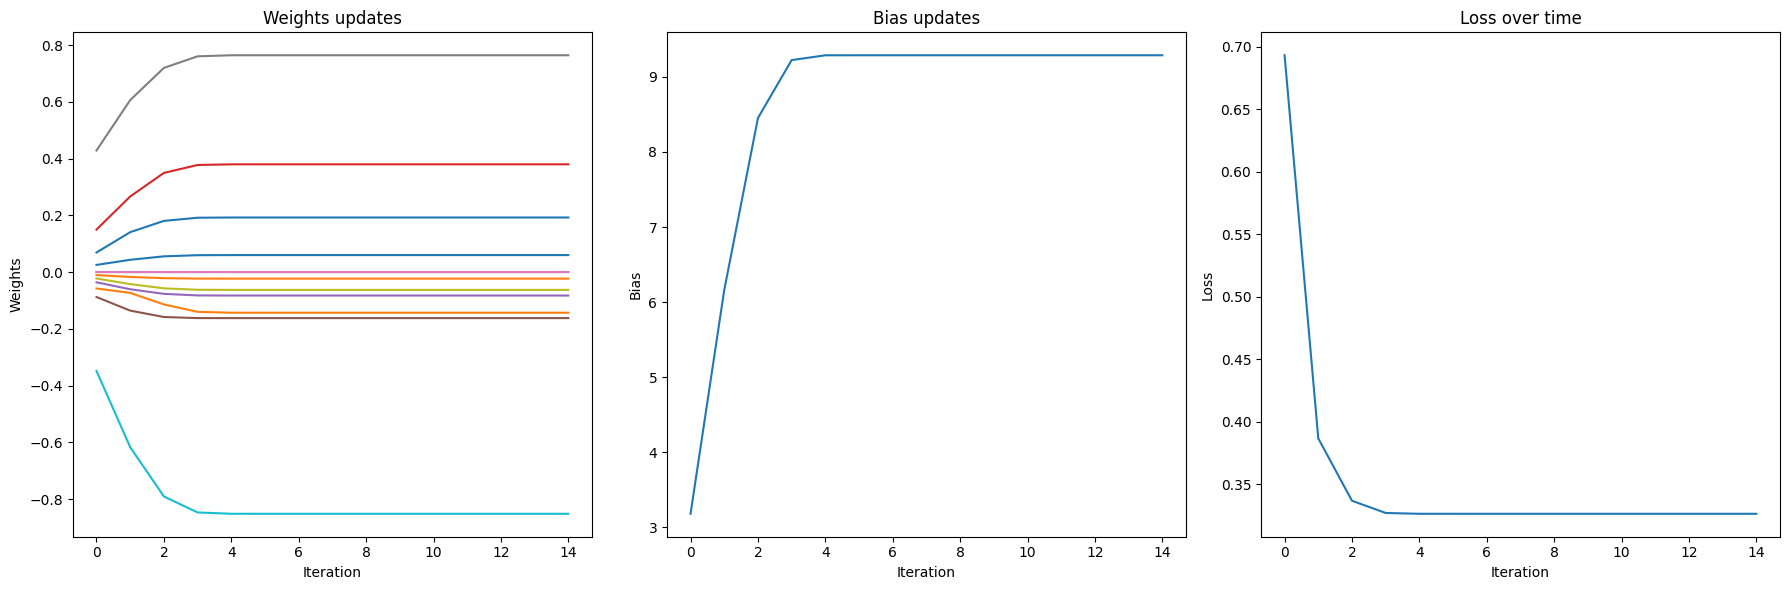

In [11]:
irls = IRLS()

log_reg = LogisticRegression(input_dim=X_train.shape[1])
log_reg.train(X_train, y_train, optimizer=irls, patience=5, epochs=100, batch_size=X_train.shape[0])

y_pred_train=log_reg.predict(X_train).round()
print(accuracy_score(y_pred_train, y_train))
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_pred.round(), y_test))

log_reg.plot_params()

# Exclude mstz/mushroom

In [12]:
from datasets import load_dataset

ds = load_dataset("mstz/mushroom")

Xy = ds["train"].with_format("pandas")[:]
oe = OrdinalEncoder()
oe.fit(Xy)
Xy[:] = oe.transform(Xy)
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,cap_shape,cap_surface,cap_color,has_bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_belows_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,number_of_rings,ring_type,spore_print_color,population,habitat
0,2.0,3.0,0.0,1.0,7.0,1.0,0.0,1.0,0.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,0.0,3.0,4.0
1,2.0,3.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,1.0,2.0,0.0
2,0.0,3.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,1.0,2.0,2.0
3,2.0,2.0,8.0,1.0,7.0,1.0,0.0,1.0,1.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,0.0,3.0,4.0
4,2.0,3.0,3.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# corr_matrix = np.corrcoef(X_train, rowvar=False)

# # Step 2: Identify collinear features
# threshold = 0.9  # Example threshold
# upper_tri_indices = np.triu_indices_from(corr_matrix, k=1)

# collinear_pairs = [(row, col) for row, col in zip(*upper_tri_indices)
#                    if abs(corr_matrix[row, col]) > threshold]

# # Step 3: Remove one feature from each pair of collinear features
# # Note: This example removes the first feature in each pair arbitrarily
# to_remove = set(row for row, _ in collinear_pairs)

In [15]:
# correlation_matrix = np.corrcoef(X_train, rowvar=False)
# high_correlation = np.where((np.abs(correlation_matrix) > 0.95) & (np.eye(correlation_matrix.shape[0]) == 0))

# # Remove one feature from each highly correlated pair
# to_remove = set()
# for i in range(len(high_correlation[0])):
#     # Choose one index to remove, e.g., the second in each pair
#     to_remove.add(high_correlation[1][i])

Epoch::  21%|██        | 21/100 [00:04<00:14,  5.54it/s]/Users/adam/Projects/WUT/AML/2024L-DSAdvancedML/projects/project1/group3/Narozniak_Czerwonski_Rucinski/src/irls_optimizer.py:11: RuntimeWarning: divide by zero encountered in divide
  W_inv = np.diagflat(1. / np.diagonal(W))
/Users/adam/Projects/WUT/AML/2024L-DSAdvancedML/projects/project1/group3/Narozniak_Czerwonski_Rucinski/src/Logreg.py:83: RuntimeWarning: divide by zero encountered in log
  batch_loss = -np.mean(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a))
Epoch::  25%|██▌       | 25/100 [00:04<00:14,  5.23it/s]


Early stopping after epoch 25
Reverting to the weights corresponding to the lowest loss
0.9427604246807201
0.9415384615384615


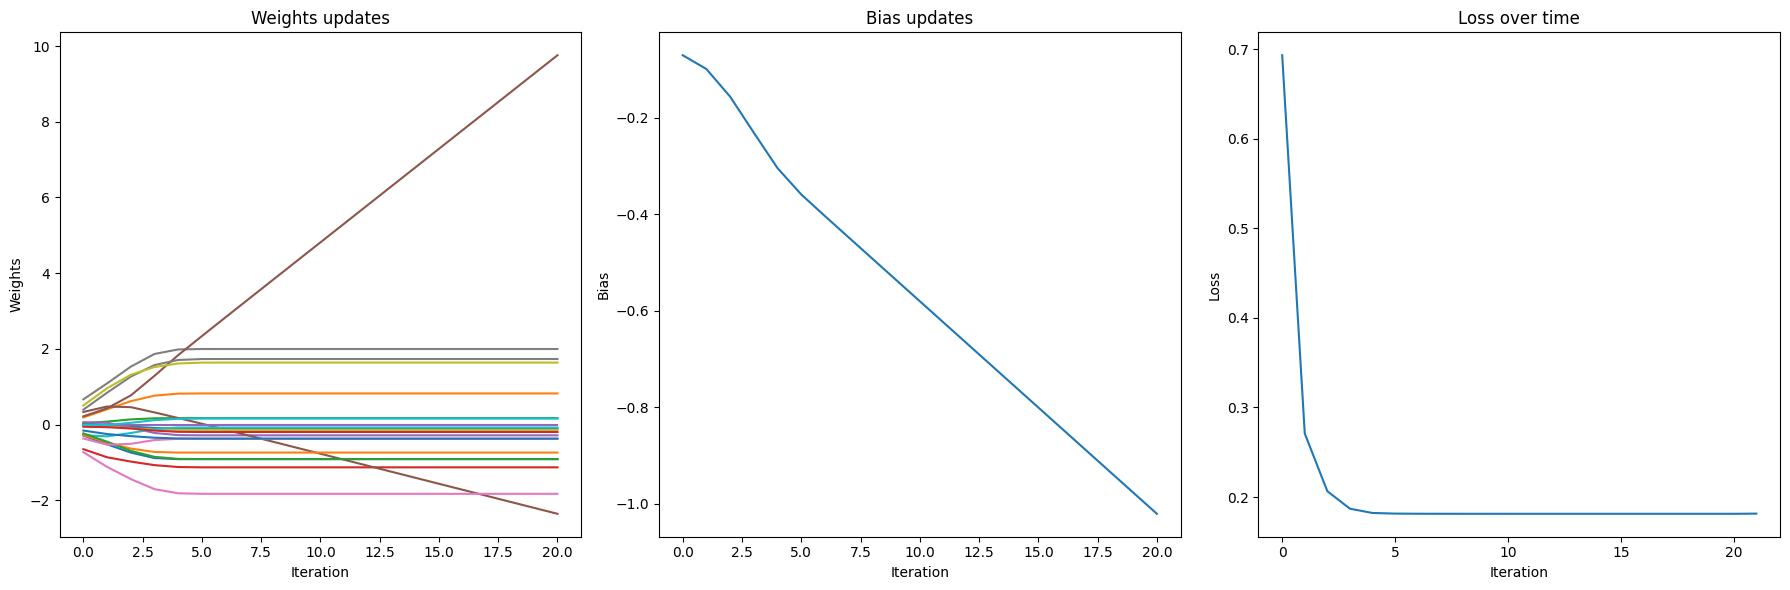

In [16]:
irls = IRLS()

log_reg = LogisticRegression(input_dim=X_train.shape[1])
log_reg.train(X_train, y_train, optimizer=irls, patience=5, epochs=100, batch_size=X_train.shape[0])

y_pred_train=log_reg.predict(X_train).round()
print(accuracy_score(y_pred_train, y_train))
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_pred.round(), y_test))

log_reg.plot_params()

In [17]:
log_reg.weights_updates

[array([ 1.55702038e-02,  1.88349032e-01,  3.32935392e-02, -6.50335555e-01,
         6.28451881e-02,  3.32944382e-01, -7.29576912e-01,  6.66998963e-01,
        -1.34829890e-02, -2.80801925e-01, -2.88257499e-01, -2.76666329e-01,
        -2.32738105e-01, -5.81490120e-02,  1.36868330e-15,  2.16795373e-01,
        -3.67797550e-01,  3.94086078e-01,  5.04858420e-01, -9.63290232e-03,
        -1.58552088e-01]),
 array([-6.23023548e-03,  4.02748377e-01,  7.85670130e-02, -8.63779994e-01,
         4.72422904e-02,  4.76354924e-01, -1.11842371e+00,  1.08664043e+00,
        -4.98442614e-02, -3.11789228e-01, -5.21554800e-01, -4.74466124e-01,
        -4.53458991e-01, -6.91236130e-02, -1.90871007e-16,  4.28643511e-01,
        -5.30658463e-01,  8.41186142e-01,  9.58611828e-01, -1.22708847e-02,
        -2.50242034e-01]),
 array([-5.38828358e-02,  6.17183335e-01,  1.36145533e-01, -9.77628873e-01,
        -7.92355093e-02,  4.59958357e-01, -1.43996291e+00,  1.52926268e+00,
        -9.93429691e-02, -2.230887